In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import trueq as tq
import trueq.simulation as tqs

# add single-qubit simultaneous SRB, XRB, IRB on a 4 qubit system
circuits = tq.make_srb(range(4), [2, 16, 32])
circuits += tq.make_xrb(range(4), [2, 16, 32])
circuits += tq.make_irb({range(4): tq.Gate.h}, [2, 8, 16])

# add two-qubit simultaneous SRB, XRB, IRB on a 4 qubit system
circuits += tq.make_srb([[0, 1], [2, 3]], [2, 10, 20])
circuits += tq.make_irb({(0, 1): tq.Gate.cx, (2, 3): tq.Gate.cx}, [2, 10, 20])

# add CB for two cycles on a 4 qubit system
circuits += tq.make_cb({(0, 1): tq.Gate.cz, (2, 3): tq.Gate.cz}, [2, 10, 20])
circuits += tq.make_cb({(0, 1): tq.Gate.cx, (2, 3): tq.Gate.cx}, [2, 10, 20])

# add single-body noise reconstruction for two cycles on a 4 qubit system
pauli_twirl = tq.Twirl("P", range(4))
circuits += tq.make_knr({(0, 1): tq.Gate.cz}, [2, 10, 20], twirl=pauli_twirl)
circuits += tq.make_knr({(0, 1): tq.Gate.cx}, [2, 10, 20], twirl=pauli_twirl)

# add some readout calibration circuits
circuits += tq.make_rcal(range(4))

In [3]:
sim = tq.Simulator()
sim.add_overrotation(0.04, 0.03)
for label, p in enumerate([0.01, 0.005, 0.03, 0.02]):
    sim.add_stochastic_pauli(pz=p, match=tqs.LabelMatch(label))
sim.add_stochastic_pauli(px=0.01, match=tqs.GateMatch(tq.Gate.cx))
sim.add_readout_error([0.01, 0.05])

# run RCAL with more shots than any other protocol
sim.run(circuits.subset(protocol="RCAL"), n_shots=4096)
sim.run(circuits.subset(has_results=False), n_shots=64)

In [4]:
fit = circuits.fit()

In [5]:
# number of estimates in the collection
len(fit)

25

In [6]:
# the first estimate object
fit[0]

NormalEstimate(_key=Key(labels=(0,), protocol='SRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)), _options={}, _names=('A', 'p', 'e_F'), _values=[0.97537066 0.98425753 0.01180686], _err=[[ 2.30693458e-04 -1.53319308e-05  1.14989481e-05]
 [-1.53319308e-05  1.82313188e-06 -1.36734891e-06]
 [ 1.14989481e-05 -1.36734891e-06  1.02551168e-06]], _raw={2: ((0.9684346701164294+0j), (0.9855109961190168+0j), (1.0346701164294956+0j), (1.0186287192755497+0j), (0.9353169469598965+0j), (0.8530401034928848+0j), (0.8861578266494177+0j), (0.9523932729624838+0j), (0.7697283311772316+0j), (0.9855109961190165+0j), (0.9353169469598965+0j), (0.9855109961190167+0j), (0.9855109961190165+0j), (0.9523932729624837+0j), (0.9855109961190166+0j), (0.9192755498059506+0j), (0.9855109961190167+0j), (0.9523932729624838+0j), (0.9684346701164294+0j), (0.9192755498059506+0j), (0.9523932729624837+0j), (1.0186287192755497+0j), (0.9523932729624837+0j), (0.9192755498059507+0j), (0.8028460543337645+0j), (0.9523932729624837+0j), (0.8690815006468305+0j), (0.9192755498059507+0j), (0.9192755498059507+0j), (0.9523932729624836+0j)), 16: ((0.7205692108667529+0j), (0.8861578266494176+0j), (0.6041397153945667+0j), (0.8028460543337645+0j), (0.6212160413971538+0j), (0.7366106080206987+0j), (0.7697283311772316+0j), (0.8199223803363518+0j), (0.8028460543337647+0j), (0.9192755498059507+0j), (0.7205692108667529+0j), (0.6372574385510996+0j), (0.7868046571798186+0j), (0.7366106080206984+0j), (0.7697283311772316+0j), (0.6874514877102199+0j), (0.7536869340232858+0j), (0.7536869340232859+0j), (0.7868046571798186+0j), (0.6703751617076327+0j), (0.8028460543337644+0j), (0.7697283311772317+0j), (0.7536869340232858+0j), (0.7366106080206988+0j), (0.5710219922380335+0j), (0.7697283311772316+0j), (0.7868046571798187+0j), (0.9021992238033637+0j), (0.8199223803363517+0j), (0.9684346701164294+0j)), 32: ((0.6212160413971538+0j), (0.7536869340232859+0j), (0.7034928848641656+0j), (0.5047865459249677+0j), (0.3391979301423027+0j), (0.7034928848641657+0j), (0.6041397153945667+0j), (0.35627425614489017+0j), (0.488745148771022+0j), (0.4716688227684347+0j), (0.6212160413971539+0j), (0.6212160413971537+0j), (0.48874514877102176+0j), (0.5710219922380337+0j), (0.5710219922380337+0j), (0.7034928848641656+0j), (0.40543337645536875+0j), (0.5880983182406208+0j), (0.8359637774902977+0j), (0.38939197930142294+0j), (0.7034928848641656+0j), (0.5047865459249676+0j), (0.4716688227684347+0j), (0.5710219922380337+0j), (0.6212160413971538+0j), (0.7366106080206984+0j), (0.6041397153945667+0j), (0.588098318240621+0j), (0.7366106080206988+0j), (0.6703751617076326+0j))})

In [7]:
# display the KeySet of all unique keys in the collection
fit.keys()

KeySet(
	Key(labels=(1,), protocol='XRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(labels=(2,), protocol='SRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(cycles=(Cycle((0, 1): Gate.cx, (2, 3): Gate.cx),), labels=(2, 3), protocol='IRB', twirl=Twirl({(0, 1): 'C', (2, 3): 'C'}, dim=2)),
	Key(labels=(2,), protocol='XRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(cycles=(Cycle((0, 1): Gate.cz),), labels=(0, 1), protocol='KNR', subsystems=((0, 1),), twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2)),
	Key(cycles=(Cycle((0, 1): Gate.cz),), labels=(3,), protocol='KNR', subsystems=((3,),), twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2)),
	Key(cycles=(Cycle((0,): Gate.h, (1,): Gate.h, (2,): Gate.h, (3,): Gate.h),), labels=(3,), protocol='IRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(cycles=(Cycle((0, 1): Gate.cx),), labels=(3,), protocol='KNR', subsystems=((3,),), twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2)),
	Key(cycles=(Cycle((0, 1): Gate.cz, (2, 3): Gate.cz),), labels=(0, 1, 2, 3), protocol='CB', twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2)),
	Key(labels=(0,), protocol='SRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(labels=(0,), protocol='XRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(cycles=(Cycle((0,): Gate.h, (1,): Gate.h, (2,): Gate.h, (3,): Gate.h),), labels=(2,), protocol='IRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(labels=(0, 1), protocol='SRB', twirl=Twirl({(0, 1): 'C', (2, 3): 'C'}, dim=2)),
	Key(cycles=(Cycle((0,): Gate.h, (1,): Gate.h, (2,): Gate.h, (3,): Gate.h),), labels=(1,), protocol='IRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(cycles=(Cycle((0, 1): Gate.cx),), labels=(0, 1), protocol='KNR', subsystems=((0, 1),), twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2)),
	Key(cycles=(Cycle((0, 1): Gate.cx),), labels=(2,), protocol='KNR', subsystems=((2,),), twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2)),
	Key(labels=(3,), protocol='SRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(cycles=(Cycle((0, 1): Gate.cx, (2, 3): Gate.cx),), labels=(0, 1, 2, 3), protocol='CB', twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2)),
	Key(cycles=(Cycle((0,): Gate.h, (1,): Gate.h, (2,): Gate.h, (3,): Gate.h),), labels=(0,), protocol='IRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(labels=(1,), protocol='SRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(labels=(2, 3), protocol='SRB', twirl=Twirl({(0, 1): 'C', (2, 3): 'C'}, dim=2)),
	Key(labels=(3,), protocol='XRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)),
	Key(labels=(0, 1, 2, 3), protocol='RCAL'),
	Key(cycles=(Cycle((0, 1): Gate.cx, (2, 3): Gate.cx),), labels=(0, 1), protocol='IRB', twirl=Twirl({(0, 1): 'C', (2, 3): 'C'}, dim=2)),
	Key(cycles=(Cycle((0, 1): Gate.cz),), labels=(2,), protocol='KNR', subsystems=((2,),), twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2)))

In [8]:
fit.subset(protocol={"IRB", "SRB"})

EstimateCollection(12)

In [9]:
est = fit.one_or_none(protocol="SRB", labels=(2,))

# the infidelity of the estimate we found
est.e_F

EstimateTuple(name='e_F', val=0.03279673880774306, std=0.0024902498731029436)

In [10]:
# identify all twirling groups used by SRB and loop through them
twirls = fit.subset(protocol="SRB").keys().twirl
for twirl in twirls:
    print(f"SRB Twirl: {twirl}")
    # get the estimates associated with SRB and this twirling group
    subset = fit.subset(protocol="SRB", twirl=twirl)
    # find out the labels in these estimates and loop through them
    for labels in sorted(subset.keys().labels):
        est = subset.one_or_none(labels=labels)
        print(f"{str(labels):>10}: {est.e_F.val:.2g}")
    print("")

SRB Twirl: Cliffords on [(0, 1), (2, 3)]
    (0, 1): 0.0041
    (2, 3): 0.0041

SRB Twirl: Cliffords on [0, 1, 2, 3]
      (0,): 0.012
      (1,): 0.008
      (2,): 0.033
      (3,): 0.023



In [11]:
sorted_fit = fit.sorted("protocol", "labels")
sorted_fit[-1]

NormalEstimate(_key=Key(labels=(3,), protocol='XRB', twirl=Twirl({(0,): 'C', (1,): 'C', (2,): 'C', (3,): 'C'}, dim=2)), _options={}, _names=('A', 'u', 'e_S', 'e_U'), _values=[1.10928303 0.95109505 0.01851068 0.00429296], _err=[[ 1.92307701e-03 -1.15536421e-04  4.41432800e-05  4.41432800e-05]
 [-1.15536421e-04  1.25976527e-05 -4.81321566e-06 -4.81321566e-06]
 [ 4.41432800e-05 -4.81321566e-06  1.83899696e-06  1.83899696e-06]
 [ 4.41432800e-05 -4.81321566e-06  1.83899696e-06  6.27711314e-06]], _raw={2: ((0.774829140555022+0j), (1.0693531729427326+0j), (0.8801244060465871+0j), (1.026457649888835+0j), (0.997975297772855+0j), (0.8959135360239243+0j), (1.0390132761235367+0j), (0.9507111047688005+0j), (0.7712172480765459+0j), (1.1656703057020867+0j), (1.0552151938126988+0j), (0.8894465285386532+0j), (1.09793872198667+0j), (0.911221080337465+0j), (0.8541187802015617+0j), (0.9733800299432332+0j), (0.9517430740483644+0j), (1.1530114825394282+0j), (1.061579004370014+0j), (1.014039619558075+0j), (0.8959135360239247+0j), (1.0289343761597896+0j), (1.1944622486019363+0j), (0.9406322048050533+0j), (0.9100515151539585+0j), (0.641877098371128+0j), (0.9154865533596648+0j), (0.9468240204824404+0j), (1.1466476719821146+0j), (1.0913341185974572+0j)), 16: ((0.8552883453850679+0j), (0.8327570161145761+0j), (0.2799998710038398+0j), (0.26159641885160606+0j), (0.3422620175375654+0j), (0.28478132866582206+0j), (0.5161832401201705+0j), (0.8640256852853808+0j), (0.6750377112211343+0j), (0.3723267225488781+0j), (0.37556022629151337+0j), (0.8575586778001101+0j), (0.5373730093272289+0j), (0.6653028010172425+0j), (0.49850216646363227+0j), (0.5137409128252015+0j), (0.5024236497259772+0j), (0.48797607981207397+0j), (0.47947953274365973+0j), (0.46203925191901934+0j), (0.4800643153354126+0j), (0.8028299070072055+0j), (0.5986031865813891+0j), (0.3339374653490785+0j), (0.590691422104728+0j), (0.44098707861590314+0j), (0.5921017801201327+0j), (0.37724577611480203+0j), (0.31749475482801726+0j), (0.5522677659289432+0j)), 32: ((0.6205841322361136+0j), (0.07807788196905104+0j), (0.20377174022000846+0j), (0.3228265961057671+0j), (0.2787615078683628+0j), (0.27556240310171254+0j), (0.06473107928668345+0j), (0.31893951181940744+0j), (0.0829625365589899+0j), (0.16796240621911976+0j), (0.26465792771431434+0j), (0.26465792771431446+0j), (0.15203568033784085+0j), (0.09816688394457344+0j), (0.10291394263057037+0j), (0.29895370677184163+0j), (0.20497570437950025+0j), (0.34116125030603+0j), (0.15327404347331858+0j), (0.0523130489559238+0j), (0.12142059171076064+0j), (0.34958899942247335+0j), (0.4892488419235368+0j), (0.23191010257613393+0j), (0.22152161182851796+0j), (0.18732902969894727+0j), (0.15836509191916992+0j), (0.08764079729301563+0j), (0.19008094777778595+0j), (0.13700332783218452+0j))})

In [12]:
array = fit.subset(protocol={"IRB", "SRB"}).array("e_F", "protocol", "labels")
array

In [13]:
# get the estimate value at this index
array.vals[1, 3]

0.03279673880774306

In [14]:
# display the axis information
array.axes

(ArrayAxis('protocol', ('IRB', 'SRB')),
 ArrayAxis('labels', ((0,), (0, 1), (1,), (2,), (2, 3), (3,))))

In [15]:
array.to_dataframe()

labels        (0,)              (0, 1)                (1,)            \
               val       std       val       std       val       std   
protocol                                                               
IRB       0.036490  0.004096  0.021767  0.002128  0.021288  0.002516   
SRB       0.011807  0.001013  0.004147  0.001629  0.007955  0.000945   

labels        (2,)             (2, 3)                (3,)            
               val      std       val       std       val       std  
protocol                                                             
IRB       0.076189  0.00720  0.025551  0.002178  0.058284  0.005557  
SRB       0.032797  0.00249  0.004128  0.002699  0.022804  0.002107

In [16]:
fit.subset(protocol={"KNR"}).array("e__[XY]", "labels", "cycles")

In [17]:
array = fit.subset(protocol={"IRB", "SRB", "XRB"}).array("e_.", "protocol", "labels")

In [18]:
array.vals[0, 2, 0]

nan

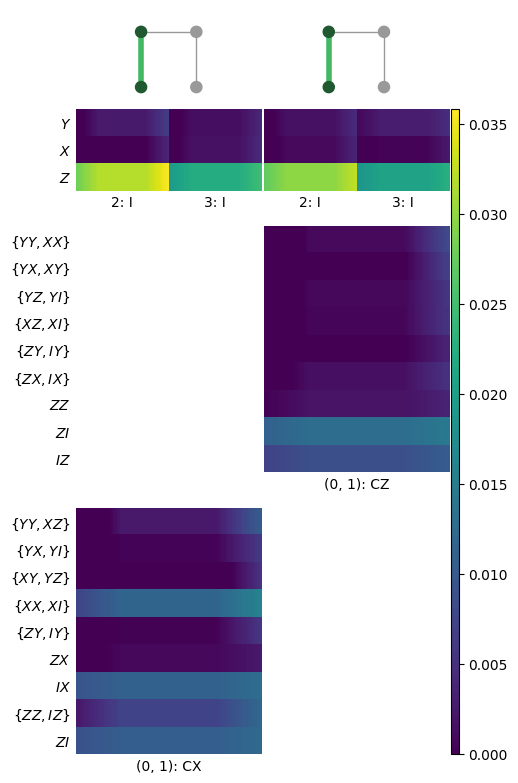

In [19]:
fit.plot.knr_heatmap(graph=tq.visualization.Graph.linear(range(4)), cutoff=0)

In [20]:
table = tq.estimate.KnrDataTable(fit)
# if necessary, set the truncation level, which will affect the amount of data shown
table.set_truncation(0)

In [21]:
# access the top-left cell seen in the figure
table.get_cell(0, 0)

Cell(mean=array([[3.18950683e-02, 2.21506894e-02],
       [2.41278228e-05, 1.62147007e-03],
       [2.62193321e-03, 1.32192012e-03]]), std=array([[0.00201139, 0.0014048 ],
       [0.00201139, 0.0014048 ],
       [0.00201139, 0.0014048 ]]), subcycles=[{(2,): Gate.id}, {(3,): Gate.id}])

In [22]:
# access the exterior x-axis information of the first column
table.col_info[0]

Col(name='', cycles=(Cycle((0, 1): Gate.cx),), twirl=Twirl({(0,): 'P', (1,): 'P', (2,): 'P', (3,): 'P'}, dim=2))

In [23]:
# access the exterior y-axis information of the top row
table.row_info[0]

Row(sort_key=(False, 1, (1,)), degens=[(('Z',),), (('X',),), (('Y',),)], param_names=['e__Z', 'e__X', 'e__Y'], latex=['$e_{Z}$', '$e_{X}$', '$e_{Y}$'])